In [ ]:
# Donald Bango
# Survival Analysis - Echocardiogram
# Dr. Bennett
# DSC 520
# 10 DEC 2024

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from scipy import stats
import lifelines
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test


In [97]:
df = pd.read_csv('/Users/don/Downloads/echocardiogram1.csv')
df.head()
df.tail()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
127,7.5,1.0,64.0,0,0.24,12.9,4.72,12.0,1.000,0.857,name,NaN,NaN
128,41.0,0.0,64.0,0,0.28,5.4,5.47,11.0,1.100,0.714,name,NaN,NaN
129,36.0,0.0,69.0,0,0.20,7.0,5.05,14.5,1.210,0.857,name,NaN,NaN
130,22.0,0.0,57.0,0,0.14,16.1,4.36,15.0,1.360,0.786,name,NaN,NaN
131,20.0,0.0,62.0,0,0.15,0.0,4.51,15.5,1.409,0.786,name,NaN,NaN


In [98]:
#Check for missing Values
print(df.isnull().sum())
print(df.shape)

survival                 2
alive                    1
age                      6
pericardialeffusion      0
fractionalshortening     8
epss                    15
lvdd                    11
wallmotion-score         4
wallmotion-index         2
mult                     3
name                     1
group                   22
aliveat1                57
dtype: int64
(132, 13)


In [99]:
print('\nMissing data percentage (%):')
print(df.isnull().sum()/df.count()*100)


Missing data percentage (%):
survival                 1.538462
alive                    0.763359
age                      4.761905
pericardialeffusion      0.000000
fractionalshortening     6.451613
epss                    12.820513
lvdd                     9.090909
wallmotion-score         3.125000
wallmotion-index         1.538462
mult                     2.325581
name                     0.763359
group                   20.000000
aliveat1                76.000000
dtype: float64


In [100]:
df.columns = ['survival', 'alive', 'age', 'pericardialeffusion', 'fractionalshortening',
              'epss', 'lvdd', 'wallmotionscore', 'wallmotionindex', 'mult', 'name', 'group', 'aliveat1']

In [101]:
# Initialize the imputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# List of columns that will be imputed
columns_1 = ['age', 'pericardialeffusion', 'fractionalshortening', 'epss', 'lvdd', 'wallmotionscore']

# Apply the imputer to the DataFrame and store it in imputed_data
imputed_data = imp_mean.fit_transform(df[columns_1])

# Create a new DataFrame with imputed values, using the new imputed_data variable
df_1 = pd.DataFrame(imputed_data, columns = columns_1)

# Shape of the new DataFrame
df_1.shape


(132, 6)

In [102]:
columns_2 = ['survival', 'alive']
df_2 = df[columns_2]
df_2.shape

(132, 2)

In [103]:
df = pd.concat([df_2, df_1], axis = 1)
df = df.dropna() 
print(df.isnull().sum())
print(df.shape)

survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotionscore         0
dtype: int64
(130, 8)


In [104]:
_='''
The dropna function is used to exclude the 'survival' and 'alive' variables from imputation, 
resulting in a dataset with 130 observations for analysis.
This approach ensures the analysis is based only on complete records for these specific variables.
'''

In [105]:
#Initial descriptive statistics tests

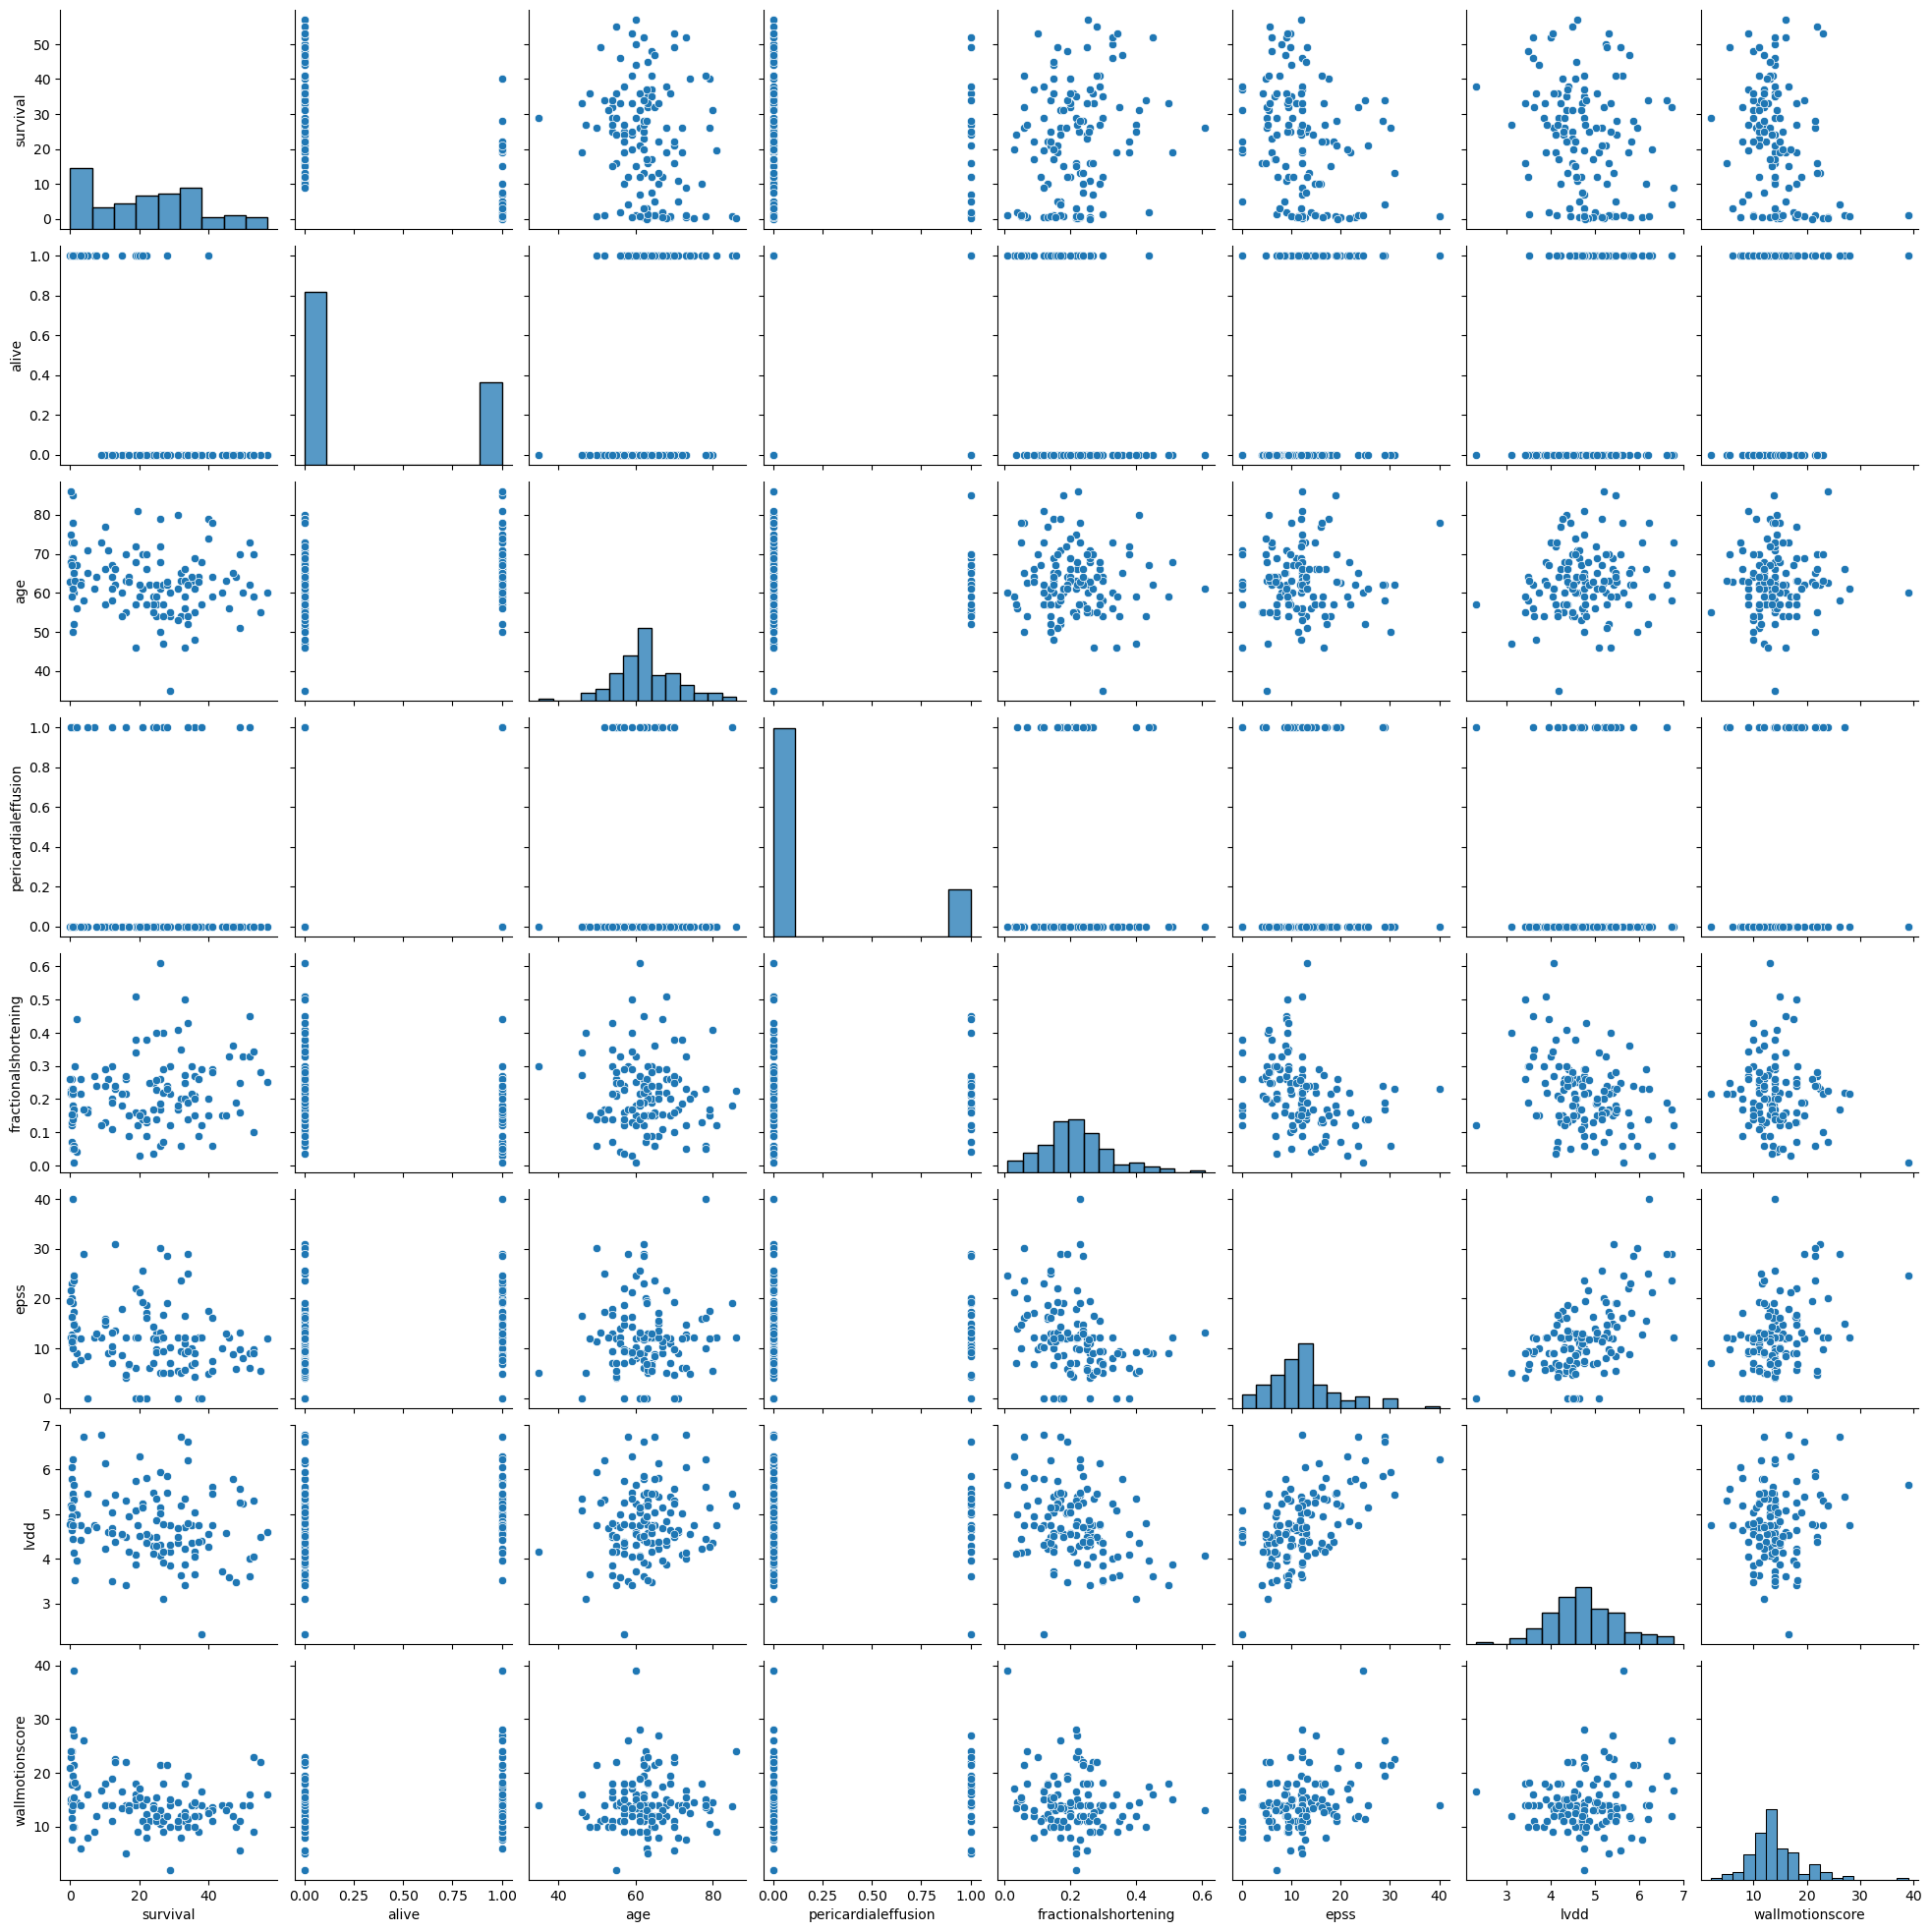

In [106]:
sns.pairplot(df)

In [107]:
df.describe()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotionscore
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,22.182923,0.323077,62.827674,0.184615,0.216863,12.186037,4.768874,14.428649
std,15.858267,0.469461,8.210192,0.389486,0.104972,6.984662,0.778480,4.978320
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000
25%,7.875000,0.000000,57.250000,0.000000,0.150000,7.525000,4.295000,11.125000
50%,23.500000,0.000000,62.264500,0.000000,0.216734,12.000000,4.750000,14.000000
75%,33.000000,1.000000,67.000000,0.000000,0.267500,14.950000,5.257500,16.375000
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.780000,39.000000


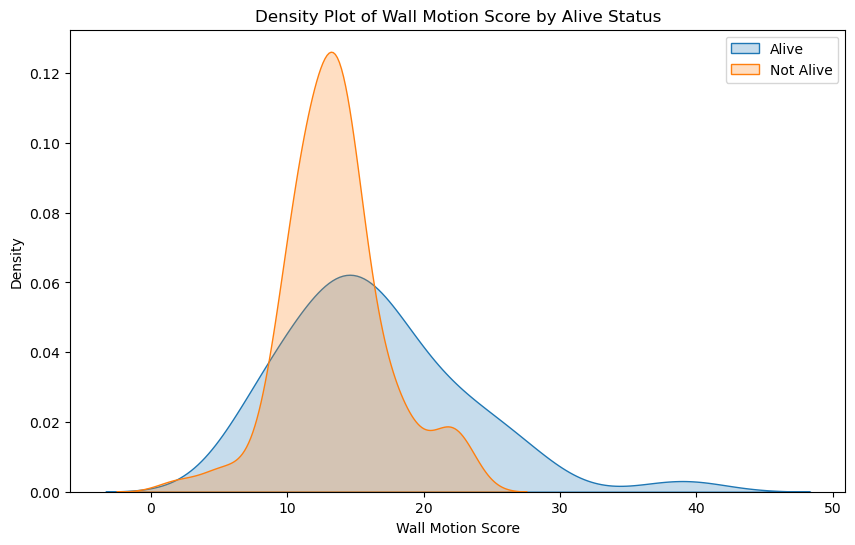

In [108]:
# Wall Motion Score vs Alive/Dead
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['alive'] == 1]['wallmotionscore'], fill=True, label='Alive')
sns.kdeplot(df[df['alive'] == 0]['wallmotionscore'], fill=True, label='Not Alive')
plt.title('Density Plot of Wall Motion Score by Alive Status')
plt.xlabel('Wall Motion Score')
plt.ylabel('Density')
plt.legend()
plt.show()


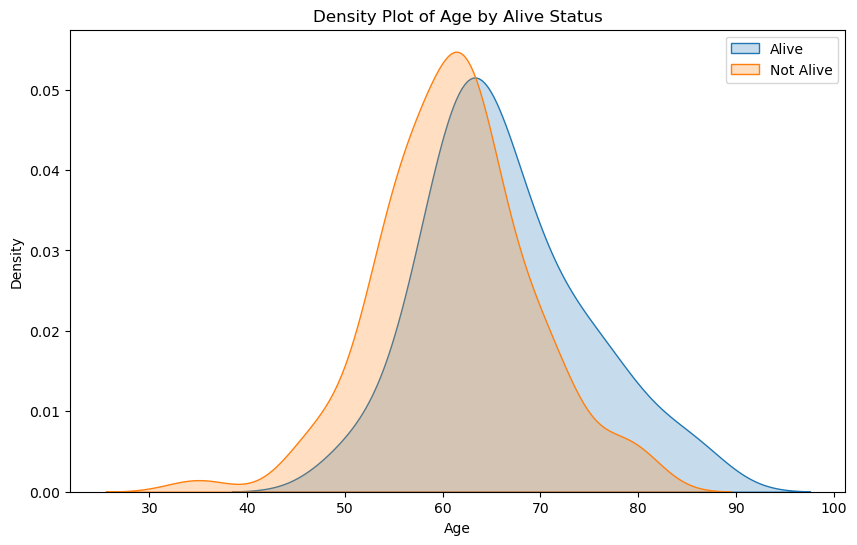

In [109]:
# Age vs Alive/Dead
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['alive'] == 1]['age'], fill=True, label='Alive')
sns.kdeplot(df[df['alive'] == 0]['age'], fill=True, label='Not Alive')
plt.title('Density Plot of Age by Alive Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [110]:
# Descriptive statistics for wallmotionscore based on alive status
stats_alive = df[df['alive'] == 1]['wallmotionscore'].describe()
stats_not_alive = df[df['alive'] == 0]['wallmotionscore'].describe()

# Combine the statistics into a single DataFrame for easier comparison
stats_combined = pd.DataFrame({'Alive': stats_alive, 'Not Alive': stats_not_alive})

# Display the statistics
print(stats_combined)


           Alive  Not Alive
count  42.000000  88.000000
mean   16.343958  13.514524
std     6.570423   3.713128
min     6.000000   2.000000
25%    12.125000  11.000000
50%    15.000000  13.585000
75%    19.165000  15.000000
max    39.000000  23.000000


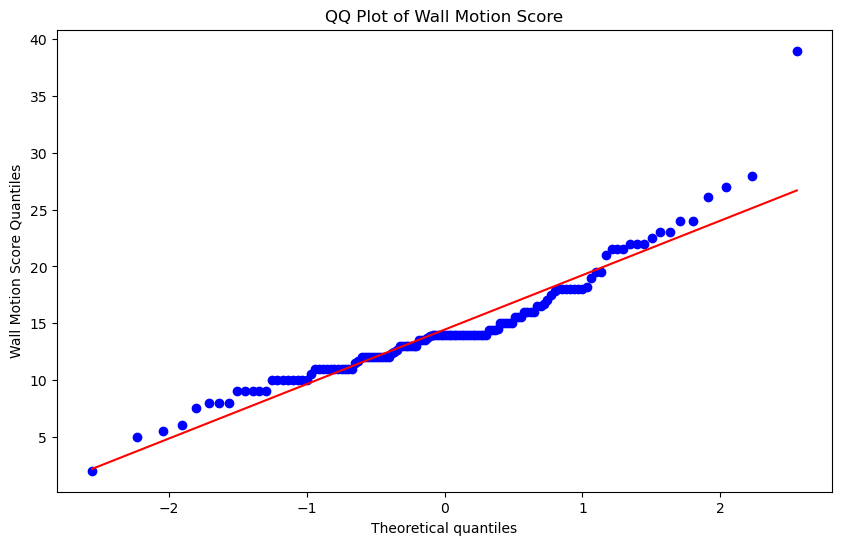

In [111]:
# QQ plot for wallmotionscore
plt.figure(figsize=(10, 6))
stats.probplot(df['wallmotionscore'], dist="norm", plot=plt)
plt.title('QQ Plot of Wall Motion Score')
plt.ylabel('Wall Motion Score Quantiles')
plt.show()

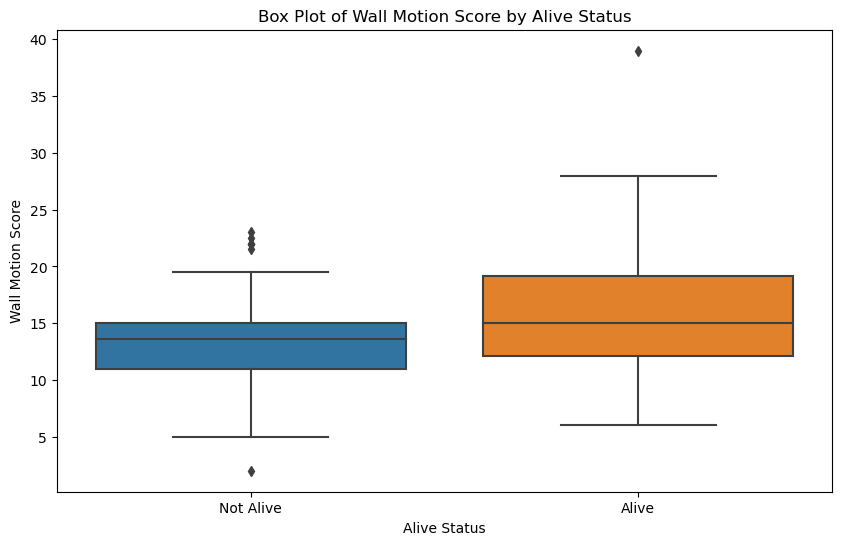

In [112]:
# Box plot for wallmotionscore based on alive status
plt.figure(figsize=(10, 6))
sns.boxplot(x='alive', y='wallmotionscore', data=df)
plt.title('Box Plot of Wall Motion Score by Alive Status')
plt.xlabel('Alive Status')
plt.ylabel('Wall Motion Score')
plt.xticks([0, 1], ['Not Alive', 'Alive'])  # Set custom labels for the x-axis
plt.show()

In [113]:
# Censored Data

'''For alive = 1 patients, because they are alive during data collection period and we do not know their survival
months after the data collection, they are regarded as censored data. Hence, the following analysis needs to consider the censored data 
by making dead variable below.

We have 88 non-censored data and 42 censored data.
'''

df.loc[df.alive == 1, 'dead'] = 0
df.loc[df.alive == 0, 'dead'] = 1
df.groupby('dead').count()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotionscore
dead,,,,,,,,
0.0,42,42,42,42,42,42,42,42
1.0,88,88,88,88,88,88,88,88


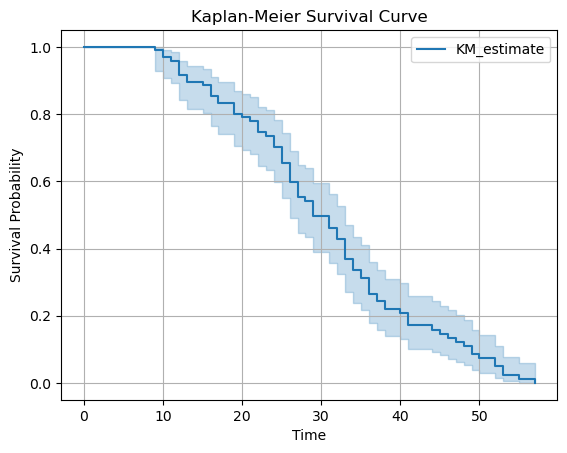

In [114]:
# Explore the KaplanMeierFitter and build a kmf object using the response variable
kmf = KaplanMeierFitter()
Time = df['survival']
Event = df['dead']

# Analyze the data with kmf.fit()
kmf.fit(Time, event_observed = Event)

# Generate a KM curve and Visualize Survival Data
kmf.plot()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

Median of age: 62.2645


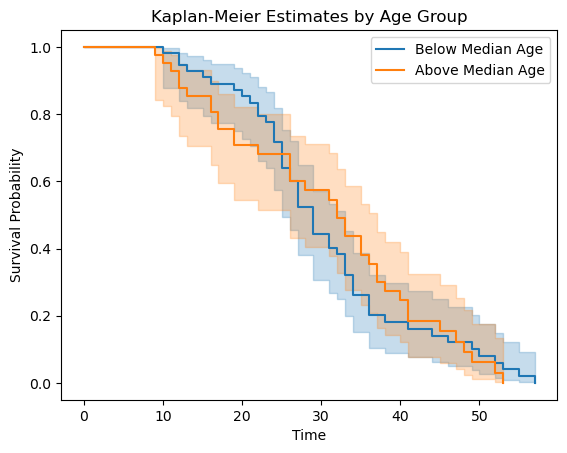

In [115]:
# Define the median for stratification
median_age = statistics.median(df['age'])
print("Median of age:", median_age)

# Stratify the data based on age
younger_group = df['age'] < median_age
older_group = df['age'] >= median_age

# Fit and plot for younger age group
ax = plt.subplot(111)
kmf.fit(T[younger_group], E[younger_group], label='Below Median Age')
kmf.plot(ax=ax)

# Fit and plot for older age group
kmf.fit(T[older_group], E[older_group], label='Above Median Age')
kmf.plot(ax=ax)

plt.title("Kaplan-Meier Estimates by Age Group")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

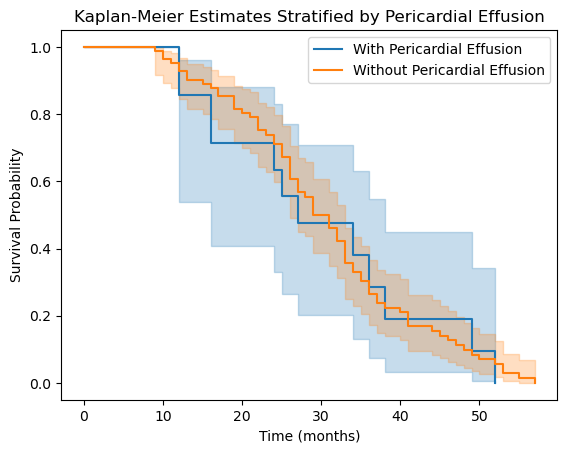

In [116]:
# Stratification based on pericardial effusion
pe_group = df['pericardialeffusion'] == 1  # Patients with pericardial effusion

# Fit and plot for patients with pericardial effusion
ax = plt.subplot(111)
kmf.fit(T[pe_group], E[pe_group], label='With Pericardial Effusion')
kmf.plot(ax=ax)

# Fit and plot for patients without pericardial effusion
kmf.fit(T[~pe_group], E[~pe_group], label='Without Pericardial Effusion')
kmf.plot(ax=ax)

plt.title("Kaplan-Meier Estimates Stratified by Pericardial Effusion")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.show()

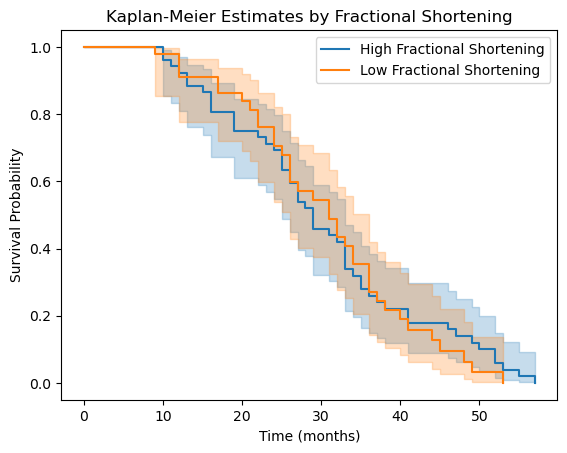

In [117]:
# Stratify by median value of 'fractional shortening'
median_fs = np.median(df['fractionalshortening'])
high_fs = df['fractionalshortening'] >= median_fs
low_fs = df['fractionalshortening'] < median_fs

ax = plt.subplot(111)

# High 'fractional shortening' group
kmf.fit(T[high_fs], E[high_fs], label='High Fractional Shortening')
kmf.plot(ax=ax)

# Low 'fractional shortening' group
kmf.fit(T[low_fs], E[low_fs], label='Low Fractional Shortening')
kmf.plot(ax=ax)

plt.title("Kaplan-Meier Estimates by Fractional Shortening")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.show()


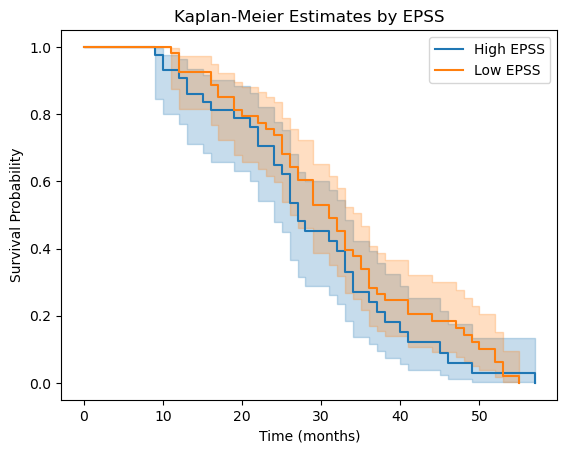

In [124]:
# Stratify by median value of 'epss'
median_epss = np.median(df['epss'])
high_epss = df['epss'] >= median_epss
low_epss = df['epss'] < median_epss
ax = plt.subplot(111)

# High 'epss' group
kmf.fit(T[high_epss], E[high_epss], label='High EPSS')
kmf.plot(ax=ax)

# Low 'epss' group
kmf.fit(T[low_epss], E[low_epss], label='Low EPSS')
kmf.plot(ax=ax)

plt.title("Kaplan-Meier Estimates by EPSS")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.show()

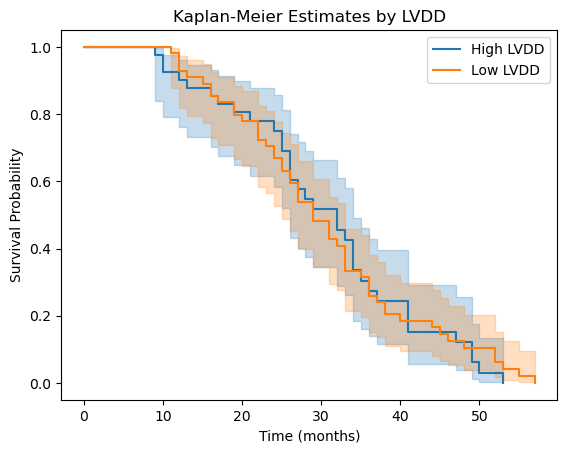

In [119]:
# Stratify by median value of 'lvdd'
median_lvdd = np.median(df['lvdd'])
high_lvdd = df['lvdd'] >= median_lvdd
low_lvdd = df['lvdd'] < median_lvdd
ax = plt.subplot(111)

# High 'lvdd' group
kmf.fit(T[high_lvdd], E[high_lvdd], label='High LVDD')
kmf.plot(ax=ax)

# Low 'lvdd' group
kmf.fit(T[low_lvdd], E[low_lvdd], label='Low LVDD')
kmf.plot(ax=ax)

plt.title("Kaplan-Meier Estimates by LVDD")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.show()


Median of wallmotion score: 14.0


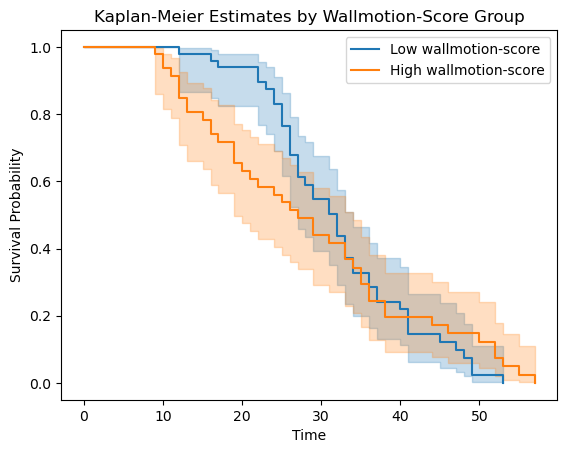

In [120]:
# Generate K-M Curves with the Predictor:
# Define the median for stratification
median_score = statistics.median(df['wallmotionscore'])
print("Median of wallmotion score:", median_score)

# Stratify the data based on wallmotion-score
low_score_group = df['wallmotionscore'] < median_score
high_score_group = df['wallmotionscore'] >= median_score

# Fit and plot for low score group
ax = plt.subplot(111)
kmf.fit(T[low_score_group], E[low_score_group], label='Low wallmotion-score')
kmf.plot(ax=ax)

# Fit and plot for high score group
kmf.fit(T[high_score_group], E[high_score_group], label='High wallmotion-score')
kmf.plot(ax=ax)

plt.title("Kaplan-Meier Estimates by Wallmotion-Score Group")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()


In [121]:
_='''
Among all the stratified analyses conducted, the only variable that demonstrated a noticeable difference was 
the wall motion score, particularly during the initial 30 months following a heart attack. 

This contrast was not evident in other stratified groups.
'''

Log-Rank Test Results:    test_statistic         p  -log2(p)
0        4.566853  0.032596  4.939144


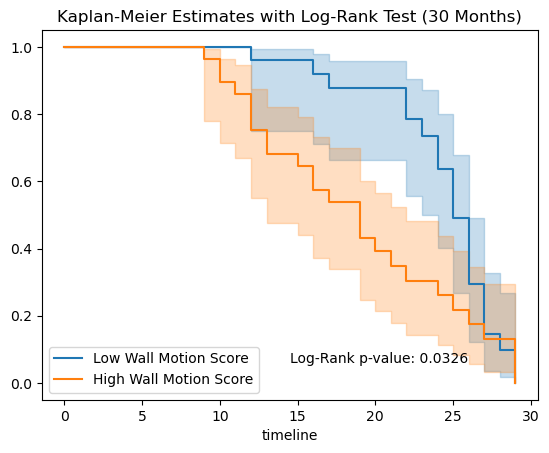

In [122]:
# Filter data for the first 30 months
df_30_months = df[df['survival'] <= 30]

# Stratify by median wall motion score
median_wms = np.median(df_30_months['wallmotionscore'].dropna())
group_low_wms = df_30_months['wallmotionscore'] < median_wms
group_high_wms = df_30_months['wallmotionscore'] >= median_wms

# Define durations and events for each group
durations_low = df_30_months[group_low_wms]['survival']
events_low = df_30_months[group_low_wms]['alive'] == 0
durations_high = df_30_months[group_high_wms]['survival']
events_high = df_30_months[group_high_wms]['alive'] == 0

# Perform Log-Rank Test
results = logrank_test(durations_low, durations_high, event_observed_A=events_low, event_observed_B=events_high)
print('Log-Rank Test Results:', results.summary)

# Plot Kaplan-Meier Curves
kmf_low = KaplanMeierFitter()
kmf_low.fit(durations_low, events_low, label='Low Wall Motion Score')
ax = kmf_low.plot()

kmf_high = KaplanMeierFitter()
kmf_high.fit(durations_high, events_high, label='High Wall Motion Score')
kmf_high.plot(ax=ax)

# Annotate plot with p-value
plt.title('Kaplan-Meier Estimates with Log-Rank Test (30 Months)')
plt.annotate(f'Log-Rank p-value: {results.p_value:.4f}', xy=(0.5, 0.1), xycoords='axes fraction')
plt.show()


In [ ]:
#Cox Hazards Model